In [1]:
import skimage
import numpy

from Rescaleintensity import RescaleIntensity
import matplotlib.pyplot as plt


image_path = "/Users/lingrajsvannur/Downloads/masks/001001-1-001001003.tif"
image = skimage.io.imread(image_path, as_gray=True)
mask = image != 1

/Users/lingrajsvannur/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"

Bad key text.latex.preview in file /Users/lingrajsvannur/opt/anaconda3/lib/python3.9/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /Users/lingrajsvannur/opt/anaconda3/lib/python3.9/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blo

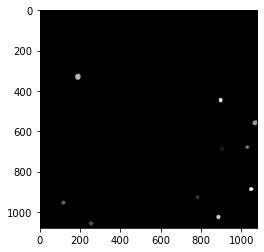

In [2]:
input_image = {'pixel_data': image, "mask": mask, "multichannel": 0, "image_name": image_path.split('/')[-1]}
rescaleobj = RescaleIntensity()
rescaled_intensity_image = rescaleobj.stretch(input_image)

plt.imshow(rescaled_intensity_image, cmap='gray')
#skimage.io.imshow(rescaled_intensity_image.astype('float'), )

In [3]:
# skimage.io.imshow(image.astype(bool))
# skimage.io.imshow(rescaled_intensity_image)

In [4]:
def resize(image_pixels, mask, resize_method, interpolation, resizing_factor_x=0.25, resizing_factor_y=0.25):

    shape = numpy.array(image_pixels.shape).astype(float)
    
    if resize_method == "Resize by a fraction":

            factor_x = resizing_factor_x
            factor_y = resizing_factor_y

            height, width = shape[:2]

            height = numpy.round(height * factor_y)
            width = numpy.round(width * factor_x)
            new_shape = []
            new_shape += [height, width]
            new_shape = numpy.asarray(new_shape)
            
            if interpolation == "Nearest Neighbor":
                order = 0

            elif interpolation == "Bilinear":
                order = 1

            output_pixels = skimage.transform.resize(
                image_pixels, new_shape, order=order, mode="symmetric")
            mask = skimage.transform.resize(mask, new_shape, order=0, mode="constant")
            resized_mask = skimage.img_as_bool(mask)
    return output_pixels, resized_mask


image_pixels = rescaled_intensity_image
resize_method = "Resize by a fraction"
interpolation = "Bilinear"
resizing_factor_x= 1.5
resizing_factor_y= 1.5
resized_image, resized_mask = resize(image_pixels, mask, resize_method, interpolation, resizing_factor_x, resizing_factor_y)
print("Resulting image after resizing is of shape: ", resized_image.shape)
print("Resulting Mask after resizing is of shape: ", resized_image.shape)
skimage.io.imsave("resized_image.png",resized_image)

/var/folders/43/qx7_xvl12vqf0nhsz8mdwxc80000gn/T/ipykernel_18109/2740753546.py:39: UserWarning: resized_image.png is a low contrast image
  skimage.io.imsave("resized_image.png",resized_image)
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Resulting image after resizing is of shape:  (1620, 1620)
Resulting Mask after resizing is of shape:  (1620, 1620)


In [5]:
from omegaconf import OmegaConf
from argparse import ArgumentParser
import math
from IdentifyPrimaryObjectsfile import IdentifyPrimaryObject

import warnings
warnings.filterwarnings('ignore')

if __name__ == '__main__':
    # get the image --- Done
    # Threshold the image
    # Fill background holes inside foreground objects
    # size function
    # add measurements ( record them to a csv file)
    # get configuration
    configFile = OmegaConf.load("/Users/lingrajsvannur/Desktop/AutoML/cellprofilebuck/identifyprimaryobj.yaml")
    po = IdentifyPrimaryObject(config_data=configFile)
    po.read_image_fn()
    binary_image, global_threshold, sigma, add_fg_bg_measurements_dict = po.threshold_fn()
    finalstats, labeled_image, outline_image, objects = po.fill_holes_fn(binary_image, global_threshold)

CellProfiler image assets were not found
CellProfiler image assets were not found
Input image dictionary: {'pixel_data': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 'mask': array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]]), 'multichannel': 0}
Object COUNT 10
Till Now [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
cool


In [6]:
finalstats

{'# of accepted objects': 9,
 '10th pctile diameter': 31.433006326383836,
 'Median diameter': 36.38913473173784,
 '90th pctile diameter': 49.15901398428714,
 'Area covered by objects': 0.003773814967230605,
 'Thresholding filter size': 0.001,
 'Declumping smoothing filter size': 16.785714285714285,
 'Maxima suppression size': 17.5}

In [7]:
desired_properties = [
                "label",
                "image",
                "area",
                "perimeter",
                "bbox",
                "bbox_area",
                "major_axis_length",
                "minor_axis_length",
                "orientation",
                "centroid",
                "equivalent_diameter",
                "extent",
                "eccentricity",
                "convex_area",
                "solidity",
                "euler_number",
            ]
from MeasureObjectSizeShape import MeasureObjects
a = MeasureObjects("yeast", calculate_zernikes=False)
ans, fullresult = a.analyze_objects(objects, desired_properties)

In [8]:
import pandas as pd

image_number = 1
df = {}
for i in fullresult:
    df[list(i.keys())[0]] = list(i.values())[0]
df = pd.DataFrame(df)
df.columns = ["_".join(a) for a in df.columns.to_flat_index()]
df['ImageNumber'] = [image_number for i in range(len(df))]

In [9]:
from MeasureObjectIntensity import MeasureObjectIntensity
image_resized = skimage.io.imread("resized_image.png")
mask = image_resized != 1 # of 3rd channel

image_path = "/Users/lingrajsvannur/Desktop/buckproject_one/yeast_segmentation/Plate13/001001-1-001001004.tif"
image1 = skimage.io.imread(image_path)
image_pixels = image1
resize_method = "Resize by a fraction"
interpolation = "Bilinear"
resizing_factor_x= 1.5
resizing_factor_y= 1.5
resized_image1, resized_mask1 = resize(image_pixels, mask, resize_method, interpolation, resizing_factor_x, resizing_factor_y)
print("Resulting image after resizing is of shape: ", resized_image.shape)
print("Resulting Mask after resizing is of shape: ", resized_image.shape)



input_image_GPF2 =  {'pixel_data': resized_image1, "mask": resized_mask, "multichannel": 0, "image_name": image_path.split('/')[-1]}
image_channel_name = "ResizeGFP2"
image_filename = "Image_FileName_GFP2"
MOIntensity = MeasureObjectIntensity(input_images=[input_image_GPF2], objects_list=[objects], image_channel_name=image_channel_name, object_name="yeast")
intensity_measurements,stats = MOIntensity.calculate()

intensity_df = pd.DataFrame(intensity_measurements)
input_image_GPF2 =  {'pixel_data': resized_image1, "mask": resized_mask, "multichannel": 0, "image_name": image_path.split('/')[-1]}
intensity_df[image_filename] = [input_image_GPF2['image_name'] for i in range(len(intensity_df))]

channel2_image = "001001-1-001001002.tif"

#input_image_GPF1 = [input_image_GPF2['image_name'] for i in range(len(intensity_df))]
intensity_df["Image_FileName_GFP1"] = [channel2_image for i in range(len(intensity_df))]

Resulting image after resizing is of shape:  (1620, 1620)
Resulting Mask after resizing is of shape:  (1620, 1620)
Has_objects: True
integrated_intensity [7.11269551 4.84411765 2.83701712 0.83307732 3.01806795 4.23693955
 3.28313412 3.96738045 4.3609013 ]


In [10]:
stats

[('001001-1-001001004.tif',
  'IntegratedIntensity',
  'yeast',
  3.833,
  3.967,
  1.605),
 ('001001-1-001001004.tif', 'MeanIntensity', 'yeast', 0.004, 0.004, 0.0),
 ('001001-1-001001004.tif', 'StdIntensity', 'yeast', 0.001, 0.001, 0.0),
 ('001001-1-001001004.tif', 'MinIntensity', 'yeast', 0.003, 0.003, 0.0),
 ('001001-1-001001004.tif', 'MaxIntensity', 'yeast', 0.006, 0.006, 0.002),
 ('001001-1-001001004.tif',
  'IntegratedIntensityEdge',
  'yeast',
  0.358,
  0.341,
  0.063),
 ('001001-1-001001004.tif', 'MeanIntensityEdge', 'yeast', 0.003, 0.003, 0.0),
 ('001001-1-001001004.tif', 'StdIntensityEdge', 'yeast', 0.0, 0.0, 0.0),
 ('001001-1-001001004.tif', 'MinIntensityEdge', 'yeast', 0.003, 0.003, 0.0),
 ('001001-1-001001004.tif', 'MaxIntensityEdge', 'yeast', 0.004, 0.004, 0.001),
 ('001001-1-001001004.tif', 'MassDisplacement', 'yeast', 0.755, 0.683, 0.439),
 ('001001-1-001001004.tif',
  'LowerQuartileIntensity',
  'yeast',
  0.003,
  0.003,
  0.0),
 ('001001-1-001001004.tif', 'MedianInt

In [11]:
intensity_df

,yeast_Intensity_IntegratedIntensity_ResizeGFP2,yeast_Intensity_MeanIntensity_ResizeGFP2,yeast_Intensity_StdIntensity_ResizeGFP2,yeast_Intensity_MinIntensity_ResizeGFP2,yeast_Intensity_MaxIntensity_ResizeGFP2,yeast_Intensity_IntegratedIntensityEdge_ResizeGFP2,yeast_Intensity_MeanIntensityEdge_ResizeGFP2,yeast_Intensity_StdIntensityEdge_ResizeGFP2,yeast_Intensity_MinIntensityEdge_ResizeGFP2,yeast_Intensity_MaxIntensityEdge_ResizeGFP2,...,yeast_Intensity_MADIntensity_ResizeGFP2,yeast_Intensity_UpperQuartileIntensity_ResizeGFP2,yeast_Location_CenterMassIntensity_X_ResizeGFP2,yeast_Location_CenterMassIntensity_Y_ResizeGFP2,yeast_Location_CenterMassIntensity_Z_ResizeGFP2,yeast_Location_MaxIntensity_X_ResizeGFP2,yeast_Location_MaxIntensity_Y_ResizeGFP2,yeast_Location_MaxIntensity_Z_ResizeGFP2,Image_FileName_GFP2,Image_FileName_GFP1
0,7.112696,0.003747,0.000350,0.002711,0.005094,0.466514,0.003456,0.000220,0.002827,0.004029,...,0.000201,0.003939,281.118122,495.573583,0.0,287.0,492.0,0.0,001001-1-001001004.tif,001001-1-001001002.tif
1,4.844118,0.004658,0.001149,0.003235,0.008357,0.398046,0.003941,0.000600,0.003371,0.006193,...,0.000540,0.005458,1340.812770,669.809751,0.0,1338.0,671.0,0.0,001001-1-001001004.tif,001001-1-001001002.tif
2,2.837017,0.003656,0.000446,0.002792,0.005163,0.292894,0.003406,0.000165,0.003090,0.003868,...,0.000231,0.003807,1539.483218,1018.533933,0.0,1535.0,1021.0,0.0,001001-1-001001004.tif,001001-1-001001002.tif
3,0.833077,0.003930,0.000675,0.003223,0.006741,0.433647,0.003872,0.000545,0.003282,0.005911,...,0.000238,0.004021,1352.370501,1033.131813,0.0,1340.0,1039.0,0.0,001001-1-001001004.tif,001001-1-001001002.tif
4,3.018068,0.003086,0.000181,0.002539,0.003711,0.288132,0.003033,0.000187,0.002620,0.003469,...,0.000119,0.003198,1568.545977,1330.110323,0.0,1562.0,1328.0,0.0,001001-1-001001004.tif,001001-1-001001002.tif
5,4.236940,0.004541,0.001238,0.003031,0.009389,0.390175,0.003788,0.000355,0.003031,0.004706,...,0.000522,0.005000,1167.916467,1392.068185,0.0,1164.0,1397.0,0.0,001001-1-001001004.tif,001001-1-001001002.tif
6,3.283134,0.003467,0.000605,0.002580,0.005703,0.291480,0.003101,0.000218,0.002611,0.003649,...,0.000281,0.003700,172.979495,1431.045853,0.0,174.0,1430.0,0.0,001001-1-001001004.tif,001001-1-001001002.tif
7,3.967380,0.003650,0.000583,0.002748,0.005482,0.341040,0.003344,0.000286,0.002851,0.004194,...,0.000322,0.003987,1324.538839,1537.832828,0.0,1316.0,1537.0,0.0,001001-1-001001004.tif,001001-1-001001002.tif
8,4.360901,0.003859,0.001031,0.002694,0.008494,0.316228,0.003070,0.000166,0.002753,0.003465,...,0.000451,0.004206,379.430405,1585.994114,0.0,381.0,1588.0,0.0,001001-1-001001004.tif,001001-1-001001002.tif


In [12]:
final_columns = ["ImageNumber","Image_FileName_GFP1","Image_FileName_GFP2","yeast_AreaShape_Center_X","yeast_AreaShape_Center_Y","yeast_AreaShape_Area","yeast_Intensity_IntegratedIntensity_ResizeGFP2","yeast_Intensity_MeanIntensity_ResizeGFP2","yeast_Intensity_StdIntensity_ResizeGFP2","yeast_Intensity_MinIntensity_ResizeGFP2","yeast_Intensity_MaxIntensity_ResizeGFP2","yeast_Intensity_IntegratedIntensityEdge_ResizeGFP2"]
final_output = pd.concat([df,intensity_df], axis=1)
final_output[final_columns]

,ImageNumber,Image_FileName_GFP1,Image_FileName_GFP2,yeast_AreaShape_Center_X,yeast_AreaShape_Center_Y,yeast_AreaShape_Area,yeast_Intensity_IntegratedIntensity_ResizeGFP2,yeast_Intensity_MeanIntensity_ResizeGFP2,yeast_Intensity_StdIntensity_ResizeGFP2,yeast_Intensity_MinIntensity_ResizeGFP2,yeast_Intensity_MaxIntensity_ResizeGFP2,yeast_Intensity_IntegratedIntensityEdge_ResizeGFP2
0,1,001001-1-001001002.tif,001001-1-001001004.tif,281.075869,495.398314,1898,7.112696,0.003747,0.000350,0.002711,0.005094,0.466514
1,1,001001-1-001001002.tif,001001-1-001001004.tif,1341.899038,669.229808,1040,4.844118,0.004658,0.001149,0.003235,0.008357,0.398046
2,1,001001-1-001001002.tif,001001-1-001001004.tif,1539.806701,1018.237113,776,2.837017,0.003656,0.000446,0.002792,0.005163,0.292894
3,1,001001-1-001001002.tif,001001-1-001001004.tif,1352.932735,1031.949776,1115,0.833077,0.003930,0.000675,0.003223,0.006741,0.433647
4,1,001001-1-001001002.tif,001001-1-001001004.tif,1568.718814,1330.072597,978,3.018068,0.003086,0.000181,0.002539,0.003711,0.288132
5,1,001001-1-001001002.tif,001001-1-001001004.tif,1169.245445,1391.612004,933,4.236940,0.004541,0.001238,0.003031,0.009389,0.390175
6,1,001001-1-001001002.tif,001001-1-001001004.tif,173.442450,1430.827878,947,3.283134,0.003467,0.000605,0.002580,0.005703,0.291480
7,1,001001-1-001001002.tif,001001-1-001001004.tif,1325.483901,1537.782889,1087,3.967380,0.003650,0.000583,0.002748,0.005482,0.341040
8,1,001001-1-001001002.tif,001001-1-001001004.tif,379.606195,1585.333628,1130,4.360901,0.003859,0.001031,0.002694,0.008494,0.316228


In [44]:
final_output.to_csv("cellprofiler_output.csv",index=None)